#1. Import libraries and modules 

In [1]:
# My text classification module. Includes preproccessing and chosen classification model for crawling use.   
from MineDeep.crawler.classification.MLClassifier import Preproccessing, plot_confusion_matrix

# A function using a window file selection for dataset path. 
from MineDeep.crawler.helpers.myHelper import choosefile

# Data analyzing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Take care of sklearn warnings
import warnings

# Dates
import datetime


#2. Loading Data 
In this section we load the data and buliding our tokenizer and stemmer objects.

In [2]:
import nltk
from nltk.tokenize import TweetTokenizer


# Load data 
data = pd.read_pickle(choosefile())
data.head()

,text,cls
0,"I posted 5 photos on Facebook in the album ""Ma...",pro
1,"Build the #BDS movement for freedom, justice, ...",pro
2,Tell your friends in the temporary racist enti...,pro
3,"I support Palestinian rights, and I’m fed up w...",pro
4,For the many not the Jew https://t.co/8dp4nwmqIw,against


#3. Proccessing 
The orginal tweets are being proccessed. The proccessing steps are:
1. Geting the tokens with the tokenizer object using NLTK tweets tokenizer
2. Fixing tokens with "'s" and "'d" paterns.
3. Punctuation and stop-words removing. We also remove in this phase problematic terms, e.g:  "__", "..." and foreign language.
4. Negation fixing. This is done by attaching not to the next word, e.g: instead of 'not happy' -> ['not', 'happy'] we will use -> ['not_happy']. Other forms of negation as isn't are being handled the same, e.g 'isn't happy' -> ['not_happy'].
5. Removing dates.
6. Removing one char tokens.
7. Removing hebrew and arabic tokens.
8. Stemming tokens (wasn't used due to unefficient to slang writing of tweets.
 

In [3]:
# Proccess tweets
tknz = TweetTokenizer()
proccessor = Preproccessing()
data.text = proccessor.proccess_data(data.text)
data.head()

,text,cls
0,posted photos facebook album mayor tory use e...,pro
1,build #bds movement freedom justice equality t...,pro
2,tell friends temporary racist entity regime de...,pro
3,support palestinian rights fed anti-jewish con...,pro
4,many not_jew,against


#4. Explore data

In [184]:
# The data shape
data.shape

(10145, 2)

In [185]:
# Lets see what are the prior probabilities of the sentiments classes
data.cls.value_counts()/len(data)

pro        0.510596
against    0.489404
Name: cls, dtype: float64

##4.1 Cloud word visualization
We want to understand which words are more dominant.

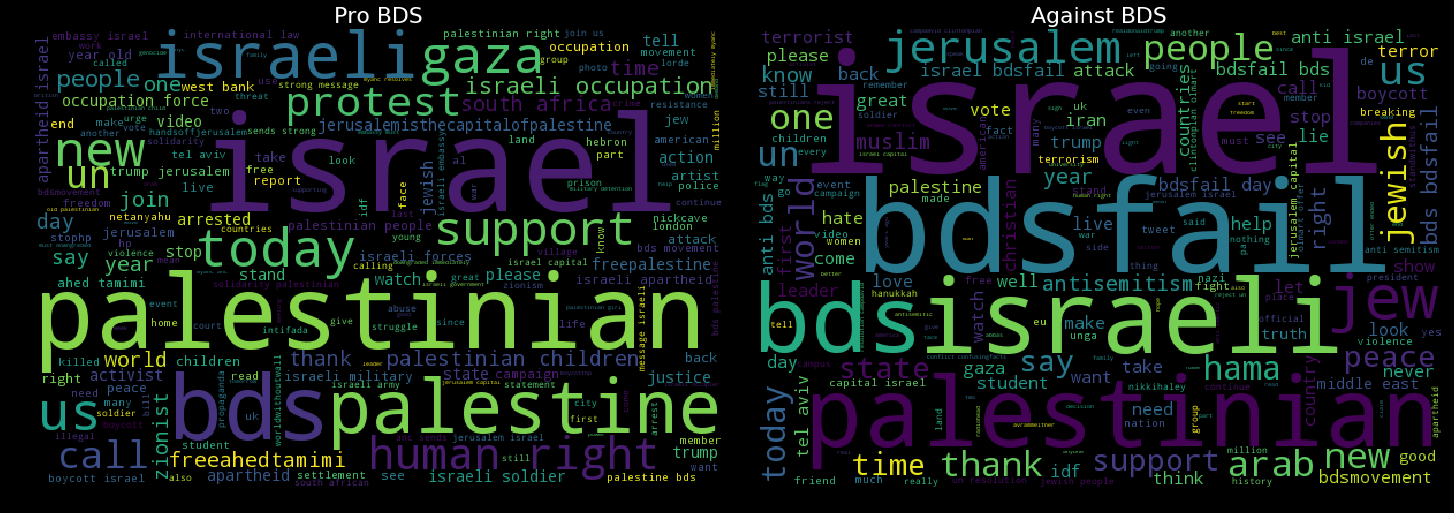

In [6]:
from wordcloud import WordCloud


# Create 2 Dataframe objects of the tweets of each sentiment class  
pro_data = data.text[data.cls == 'pro']
against_data = data.text[data.cls == 'against']

# Create text of all tweets of each class
pro_words = ' '.join(pro_data)
against_words = ' '.join(against_data)

# Generate word cloud objects 
pro_wordcloud = WordCloud(width=600, height=400).generate(pro_words)
against_wordcloud = WordCloud(width=600, height=400).generate(against_words)

# Create the word clouds figure
plt.figure(figsize=(20, 20), facecolor='k')

# Pro word cloud 
plt.subplot(221)
plt.imshow(pro_wordcloud)
plt.axis("off")
plt.title('Pro BDS', color='white', size=22)
plt.tight_layout(pad=0)

# Against word cloud
plt.subplot(222)
plt.imshow(against_wordcloud)
plt.axis("off")
plt.title('Against BDS', color='white', size=22)
plt.tight_layout(pad=0)

plt.show()

##4.2 Hashtags Word Clouds

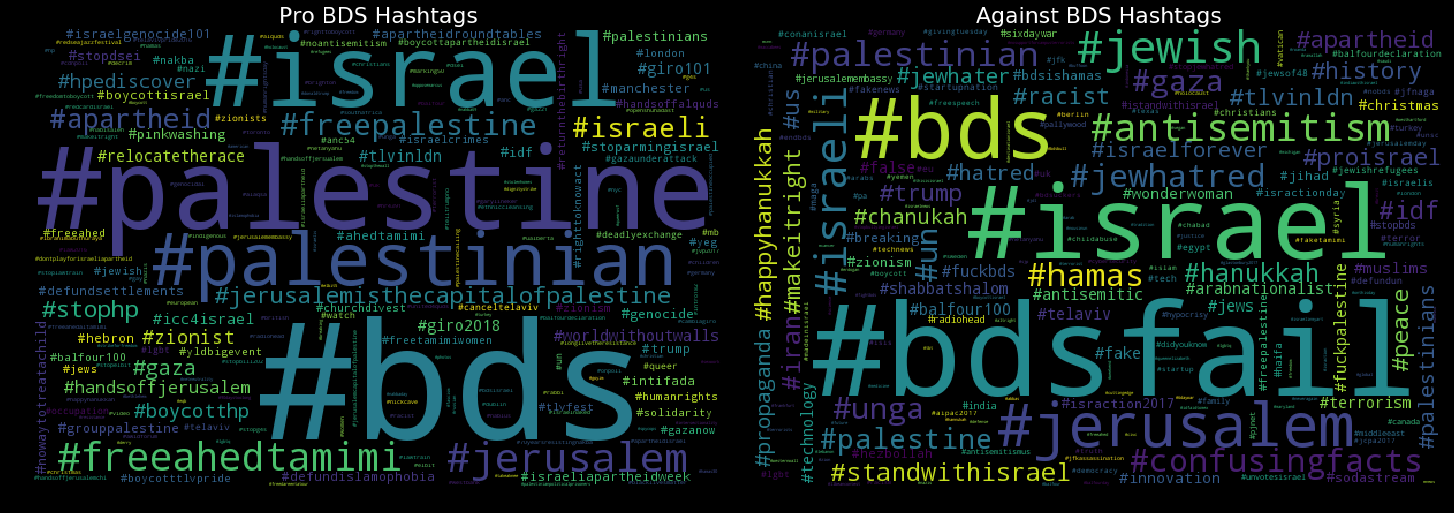

In [7]:
# Extracting pro hashtags
pro_data_hashtags=[]
for tweet in pro_data:
    hashtags = ' '.join([token for token in tknz.tokenize(tweet) if '#' in token])
    pro_data_hashtags.append(hashtags)
pro_data_hashtags = ' '.join(pro_data_hashtags)
pro_hashtags_freq = nltk.FreqDist(tknz.tokenize(pro_data_hashtags))

# Extracting against hashtags
against_data_hashtags=[]
for tweet in against_data:
    hashtags = ' '.join([token for token in tknz.tokenize(tweet) if '#' in token])
    against_data_hashtags.append(hashtags)
against_data_hashtags = ' '.join(against_data_hashtags)
against_hashtags_freq = nltk.FreqDist(tknz.tokenize(against_data_hashtags))

# Generate word cloud objects 
pro_wordcloud_hashtags = WordCloud(width=600, height=400).generate_from_frequencies(pro_hashtags_freq)
against_wordcloud_hashtags = WordCloud(width=600, height=400).generate_from_frequencies(against_hashtags_freq)

# Create the word clouds figure
plt.figure(figsize=(20, 20), facecolor='k')

# Pro word cloud 
plt.subplot(221)
plt.imshow(pro_wordcloud_hashtags)
plt.axis("off")
plt.title('Pro BDS Hashtags', color='white', size=22)
plt.tight_layout(pad=0)

# Against word cloud 
plt.subplot(222)
plt.imshow(against_wordcloud_hashtags)
plt.axis("off")
plt.title('Against BDS Hashtags', color='white', size=22)
plt.tight_layout(pad=0)

plt.show()


#5. Feature Engineering
In this phase we use sklearn to extract features by "bag-of-words" method and using terms as features for sentiment classification. Each feature/term was count vectorized, while demanding appearence in at least three different tweets. Furthemore, we used unigrams and bigrams as features for improving terms contex of sentiment.
After creating this sparse matrix of count vectors of each tweet, we splited the dataset to two set - train and test sets. The trainset will be used for the cross validation training. 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=3, tokenizer=tknz.tokenize, ngram_range=(1, 2), analyzer='word',
                                     stop_words='english')
X_train_counts = count_vect.fit_transform(data.text)
print(count_vect.get_feature_names()[3000:3020])

['chest', 'chicago', 'chief', 'child', 'child abuse', 'child ahed', 'child detainees', 'child occupied', 'child prisoners', 'children', 'children act', 'children book', 'children detained', 'children human', 'children israel', 'children israeli', 'children living', 'children military', 'children palestinian', 'children rights']


#6. Machine Learning sentiment classification models
We are going to use some popular machine learning models for sentiment analysis and text classification. 
In each model training we used GridSearch for feature selection using chi square and tuning the Hyperparameter of the model. The train-validate proccess was done in some cases with 8-Folds Cross Validation and other with 5-Folds Cross Validation due to computing time.

###Importing Scikit-Learn modules

In [5]:
# Gridsearch using a pipline searching optimal hyperparameters and best percentile of feature selection (by chi-square)  
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# tf-idf feature extraction 
from sklearn.feature_extraction.text import TfidfTransformer
# Percentile feature selection by chi-square
from sklearn.feature_selection import SelectPercentile, chi2
# Confusion matrix visualization of accuracy results
from sklearn.metrics import confusion_matrix

##6.1 Bernouli Naive Bayes Model
In Bernouli NB we calculate the postrior probability using Bernouli distrubution. The hyperparameter "alpha" of the Naive Bayes algorithem is a laplace smoothing for values normalization.


In [962]:
from sklearn.naive_bayes import BernoulliNB

# Cross Validation dataset
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]

# Create a gridsearch using select best percentile of features and bnb model
ch2 = SelectPercentile(chi2)
pipeline = Pipeline([('pbest', ch2),
                     ('bnb', BernoulliNB())])
parameters = {'pbest__percentile': np.arange(10, 40, 5),
              'bnb__alpha': np.logspace(-4, 0, 100)}
grid_search_bnb = GridSearchCV(pipeline, parameters, cv=5, verbose=1, n_jobs=-1, return_train_score=True)

# Fitting model
grid_search_bnb.fit(X_train_validate, Y_train_validate)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.0s


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.3s


[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min


[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.8min


[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.5min


[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.4min


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  4.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pbest', SelectPercentile(percentile=10, score_func=<function chi2 at 0x7f3ee6c9ed90>)), ('bnb', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bnb__alpha': array([  1.00000e-04,   1.09750e-04, ...,   9.11163e-01,   1.00000e+00]), 'pbest__percentile': array([10, 15, 20, 25, 30, 35])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

###Visualize the cross validation results
We can see the model best accuracy is achived at the alpha values range of [0.2, 0.4]. Moreover, the more features we had in the model, the better accuracy we had. This make sense, but for dealing with overfitting and the curse of deimentioulty we would like to reduce the number of features.  

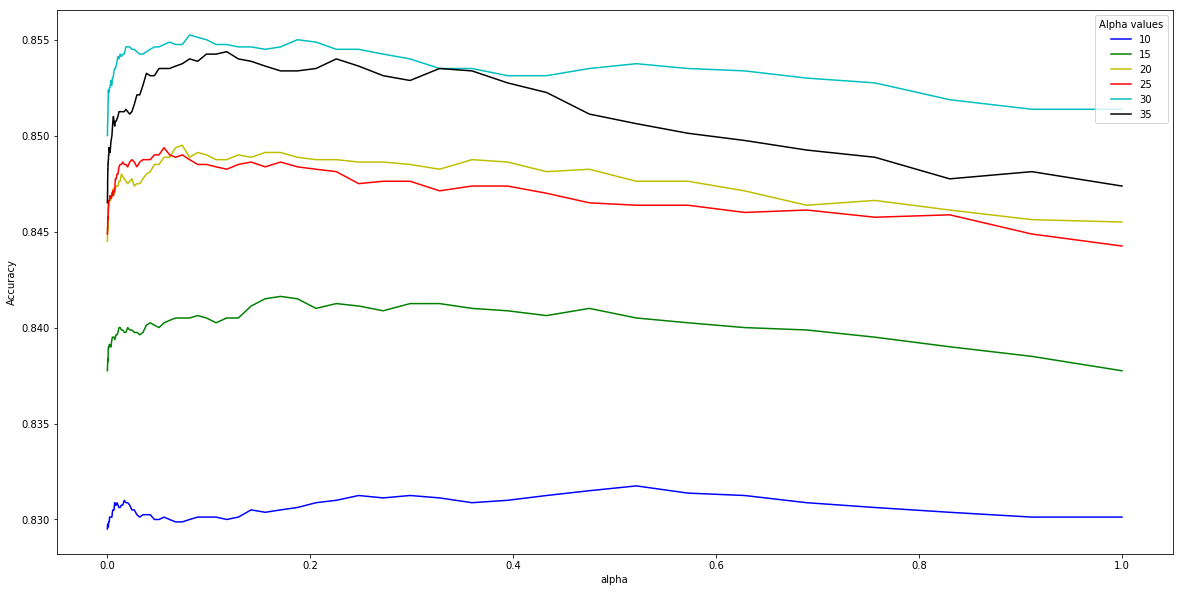

In [964]:
plt.figure(figsize=(20, 10))
plt.plot(grid_search_bnb.cv_results_['param_bnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_bnb.cv_results_['mean_test_score'][np.arange(0, 600, 6)], 'b', label='10')
plt.plot(grid_search_bnb.cv_results_['param_bnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_bnb.cv_results_['mean_test_score'][np.arange(1, 600, 6)], 'g', label='15')
plt.plot(grid_search_bnb.cv_results_['param_bnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_bnb.cv_results_['mean_test_score'][np.arange(2, 600, 6)], 'y', label='20')
plt.plot(grid_search_bnb.cv_results_['param_bnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_bnb.cv_results_['mean_test_score'][np.arange(3, 600, 6)], 'r', label='25')
plt.plot(grid_search_bnb.cv_results_['param_bnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_bnb.cv_results_['mean_test_score'][np.arange(4, 600, 6)], 'c', label='30')
plt.plot(grid_search_bnb.cv_results_['param_bnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_bnb.cv_results_['mean_test_score'][np.arange(5, 600, 6)], 'k', label='35')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend(title='Alpha values')
plt.show()

### Best features selection - train and validation results
As we analyze the best precentile features selection and its accuracy results with different alpha values, we have detected that the test results are as aspected. The test results has parabolic shapeshape of   

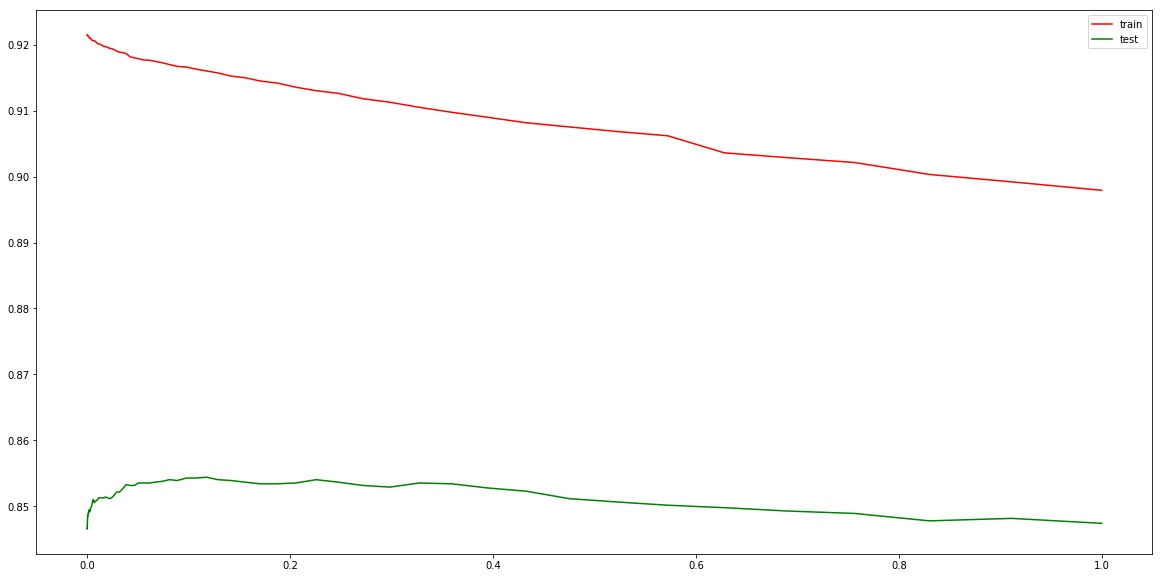

In [966]:
plt.figure(figsize=(20, 10))
plt.plot(grid_search_bnb.cv_results_['param_bnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_bnb.cv_results_['mean_train_score'][np.arange(5, 600, 6)], 'r', label='train')
plt.plot(grid_search_bnb.cv_results_['param_bnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_bnb.cv_results_['mean_test_score'][np.arange(5, 600, 6)], 'g', label='test')
plt.legend()
plt.show()

### Best Model selection - Bernouli Naive Bayes 

In [972]:
print('The chosen parameters are: ', grid_search_bnb.best_params_)
print('The best model cross validation mean accuracy is: ', grid_search_bnb.best_score_)
alpha = grid_search_bnb.best_params_['bnb__alpha']
prcnt = grid_search_bnb.best_params_['pbest__percentile']

The chosen parameters are:  {'bnb__alpha': 0.081113083078968723, 'pbest__percentile': 30}
The best model cross validation mean accuracy is:  0.85525


### Bernouli NB final Model test results
Our final model will be trained on the entire train-validation dataset, and will be tested on the test set. 

In [974]:
# Transforming the dataset by the chi square feature selection 
ch2 = SelectPercentile(chi2, percentile=prcnt)
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]
X_train_validate = ch2.fit_transform(X_train_validate, Y_train_validate)

print('The train dataset shape: ', X_train_validate.shape)

# Test transform
X_test = ch2.transform(X_train_counts[8001:])
Y_test = data.cls[8001:]

# Fit the choosen model
clf_test_bnb = BernoulliNB(alpha=alpha).fit(X_train_validate, Y_train_validate)

# Train and test results 
print("The final train score is: ", clf_test_bnb.score(X_train_validate, Y_train_validate))
print("The final test score is: ", clf_test_bnb.score(X_test, Y_test))

The train dataset shape:  (8000, 3033)
The final train score is:  0.90475
The final test score is:  0.860541044776


###Analyzing the test result
A comfussion matrix was built due to the test results. It appears that the 'pro' class results are better than the 'against' class. There are two possible causes to this. First, there are more 'pro' examples in the dataset. Second, while exploring the tweets, it had appeared that there is a lot of noise in the 'against' class examples and strong depedency between some features of the pro class. This depedency affect the Naive Bayes assumption of no depedency between features.

Yet, we can see the results are not so different and there isn't one class dominanting the other by far. 

Normalized confusion matrix
[[ 0.92  0.08]
 [ 0.19  0.81]]


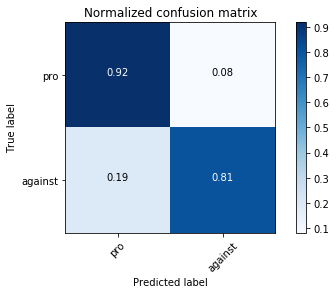

In [976]:
# Confusion matrix build
cnf_matrix = confusion_matrix(Y_test, clf_test_bnb.predict(X_test))
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y_test.unique().tolist(), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

##6.2 Train Multinominal Naive Bayes Model
This Naive Bayes algorithem is similar to the Bernouli algorithem, except we use the multinominal distribution for calculating the posterior probabilities.


In [978]:
from sklearn.naive_bayes import MultinomialNB

# Cross validation dataset
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]

# Create a gridsearch using select best percentile of features and mnb model
ch2 = SelectPercentile(chi2)
pipeline = Pipeline([('pbest', ch2),
                     ('mnb', MultinomialNB())])
parameters = {'pbest__percentile': np.arange(10, 40, 5), 
              'mnb__alpha': np.logspace(-4, 0, 100)}
grid_search_mnb = GridSearchCV(pipeline, parameters, cv=5, verbose=1, n_jobs=-1, return_train_score=True)

# Fit model
grid_search_mnb.fit(X_train_validate, Y_train_validate)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.8s


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.4s


[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min


[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.8min


[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.5min


[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.4min


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pbest', SelectPercentile(percentile=10, score_func=<function chi2 at 0x7f3ee6c9ed90>)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'mnb__alpha': array([  1.00000e-04,   1.09750e-04, ...,   9.11163e-01,   1.00000e+00]), 'pbest__percentile': array([10, 15, 20, 25, 30, 35])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

###Visualize the cross validation results
As we have done with the Bernouli Naive Bayes model, we visualize the Cross Validation accuracy results of each precentile feature selection. In this model we see the precentile values have less effect on the accuracy than the Bernouli model. 

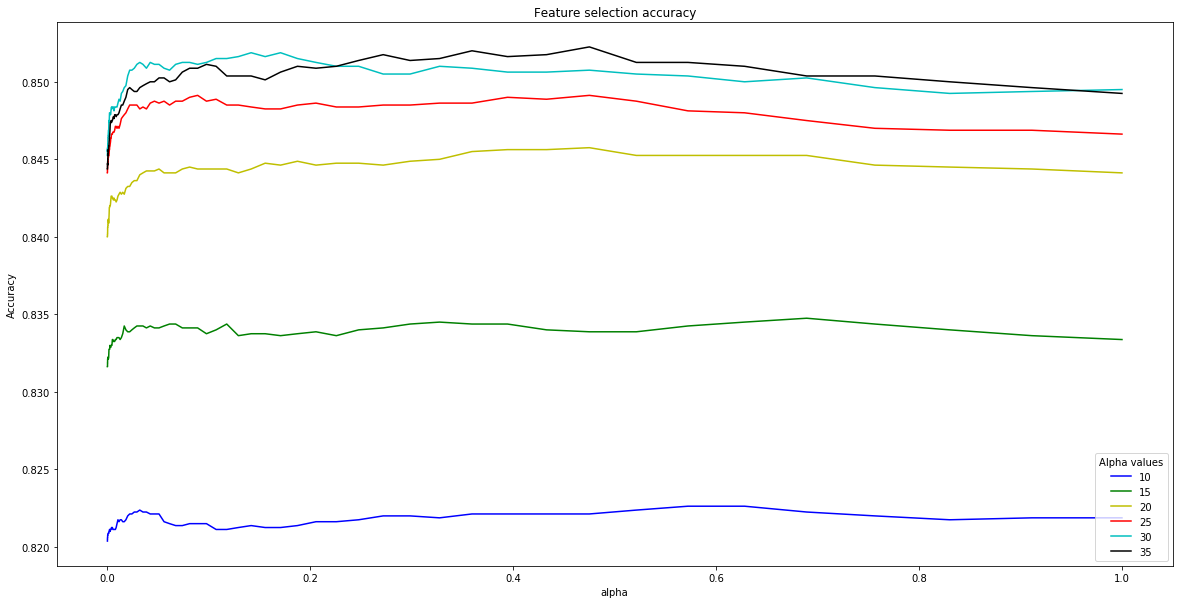

In [979]:
plt.figure(figsize=(20, 10))
plt.plot(grid_search_mnb.cv_results_['param_mnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_mnb.cv_results_['mean_test_score'][np.arange(0, 600, 6)], 'b', label='10')
plt.plot(grid_search_mnb.cv_results_['param_mnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_mnb.cv_results_['mean_test_score'][np.arange(1, 600, 6)], 'g', label='15')
plt.plot(grid_search_mnb.cv_results_['param_mnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_mnb.cv_results_['mean_test_score'][np.arange(2, 600, 6)], 'y', label='20')
plt.plot(grid_search_mnb.cv_results_['param_mnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_mnb.cv_results_['mean_test_score'][np.arange(3, 600, 6)], 'r', label='25')
plt.plot(grid_search_mnb.cv_results_['param_mnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_mnb.cv_results_['mean_test_score'][np.arange(4, 600, 6)], 'c', label='30')
plt.plot(grid_search_mnb.cv_results_['param_mnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_mnb.cv_results_['mean_test_score'][np.arange(5, 600, 6)], 'k', label='35')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend(title='Alpha values')
plt.title('Feature selection accuracy')
plt.show()

### Best features selection - train and validation results
The Multinominal model accuracy results act the same both on the training set an on the test set. 

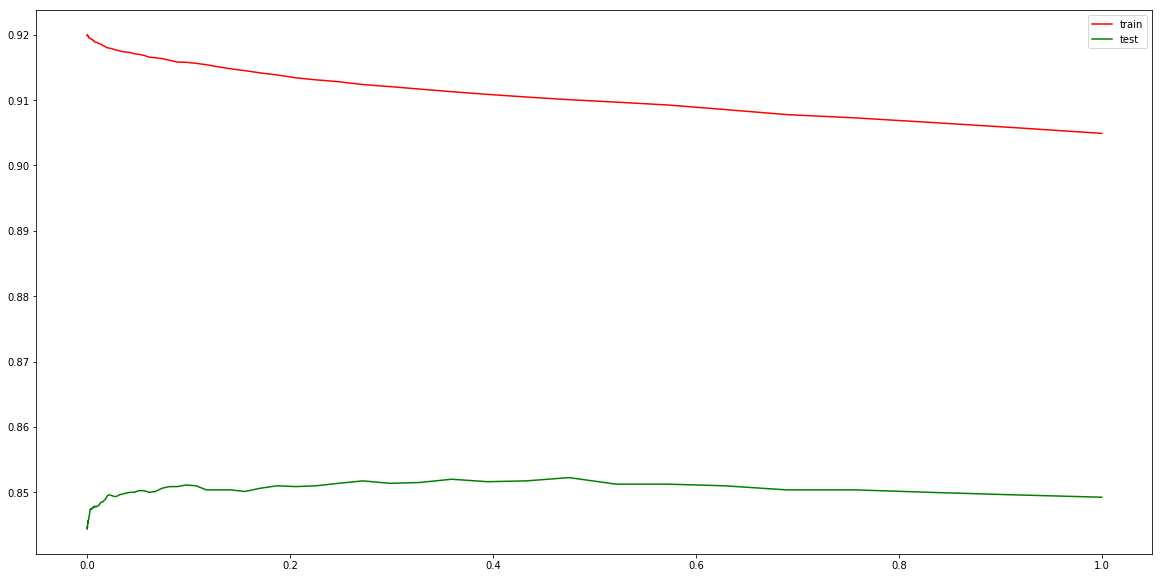

In [981]:
plt.figure(figsize=(20, 10))
plt.plot(grid_search_mnb.cv_results_['param_mnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_mnb.cv_results_['mean_train_score'][np.arange(5,600,6)], 'r', label = 'train')
plt.plot(grid_search_mnb.cv_results_['param_mnb__alpha'].data[np.arange(0, 600, 6)].tolist(),
         grid_search_mnb.cv_results_['mean_test_score'][np.arange(5,600,6)], 'g', label = 'test')
plt.legend()
plt.show()

### Best Model selection - Multinominal Naive Bayes 

In [983]:
print(grid_search_mnb.best_params_)
print('The best model cross validation mean accuracy is: ', grid_search_mnb.best_score_)

# Best grid parameters
alpha = grid_search_mnb.best_params_['mnb__alpha']
prcnt = grid_search_mnb.best_params_['pbest__percentile']

{'mnb__alpha': 0.47508101621027982, 'pbest__percentile': 35}
The best model cross validation mean accuracy is:  0.85225


### MNB final Model test results
Our final model will be trained on the entire train-validation dataset, and will be tested on the test set. 

In [985]:
ch2 = SelectPercentile(chi2,percentile=prcnt)
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]
X_train_validate = ch2.fit_transform(X_train_validate, Y_train_validate)
#print(count_vect.get_feature_names())
print('The train dataset shape: ', X_train_validate.shape)

# test transform
X_test = ch2.transform(X_train_counts[8001:])
Y_test = data.cls[8001:]

# Train and test results 
clf_test_mnb = MultinomialNB(alpha=alpha).fit(X_train_validate, Y_train_validate)
print("The final train score is: ", clf_test_mnb.score(X_train_validate, Y_train_validate))
print("The final test score is: ", clf_test_mnb.score(X_test, Y_test))

The train dataset shape:  (8000, 3539)
The final train score is:  0.90425
The final test score is:  0.852145522388


###Analyzing the test result
We can notice this model has worst accuracy than the Bernouli model, but better balance between the sentiment classes accuracy results.

Normalized confusion matrix
[[ 0.83  0.17]
 [ 0.13  0.87]]


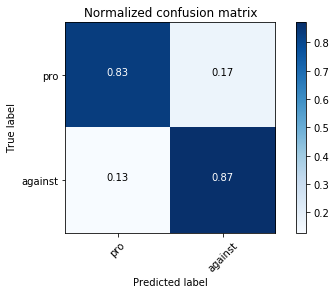

In [987]:
cnf_matrix = confusion_matrix(Y_test, clf_test_mnb.predict(X_test))
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y_test.unique().tolist(), normalize=True,
                         title='Normalized confusion matrix')
plt.show()

###6.4 TF-IDF vectorizer for Multonominal Naive Bayes
Its has been shown that the tf-idf weighting improve the classifier results, even in a naive bayes classifier. Therefore, we will use it in training the Multinominal Naive Bayes.

In [989]:
# Cross validation dataset
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]

# Create a gridsearch using select best percentile of features, tf-idf weighting and mnb model parameters.
ch2 = SelectPercentile(chi2)
pipeline = Pipeline([('pbest', ch2),
                     ('tfidf', TfidfTransformer()),
                     ('mnb', MultinomialNB())]
)
parameters = {'pbest__percentile': np.arange(10, 40, 5),
              'tfidf__use_idf': (True, False),
              'mnb__alpha': np.logspace(-4, 0, 100),
}
grid_search_mnb_idf = GridSearchCV(pipeline, parameters, cv=5, verbose=1,
                                   n_jobs=-1, return_train_score=True)

# Fit model
grid_search_mnb_idf.fit(X_train_validate, Y_train_validate)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.9s


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.3s


[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min


[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min


[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.5min


[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.5min


[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.6min


[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.8min


[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  7.1min


[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  8.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pbest', SelectPercentile(percentile=10, score_func=<function chi2 at 0x7f3ee6c9ed90>)), ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'tfidf__use_idf': (True, False), 'mnb__alpha': array([  1.00000e-04,   1.09750e-04, ...,   9.11163e-01,   1.00000e+00]), 'pbest__percentile': array([10, 15, 20, 25, 30, 35])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

### Best Model selection - MNB with TF-IDF
According to some articles, the tf-idf is less suitable for short text as tweet. However, using tf without the idf will be compatible with short text and will improve classification results. This assumption is reflected in the gridsearch result of the use_idf paremeter, which has better results when was set off. 

In [990]:
print(grid_search_mnb_idf.best_params_)
print('The best model cross validation mean accuracy is: ', grid_search_mnb_idf.best_score_)

# Best gridsearch parameters
alpha = grid_search_mnb_idf.best_params_['mnb__alpha']
prcnt = grid_search_mnb_idf.best_params_['pbest__percentile']
use_idf = grid_search_mnb_idf.best_params_['tfidf__use_idf']

{'tfidf__use_idf': False, 'mnb__alpha': 0.20565123083486536, 'pbest__percentile': 35}
The best model cross validation mean accuracy is:  0.854125


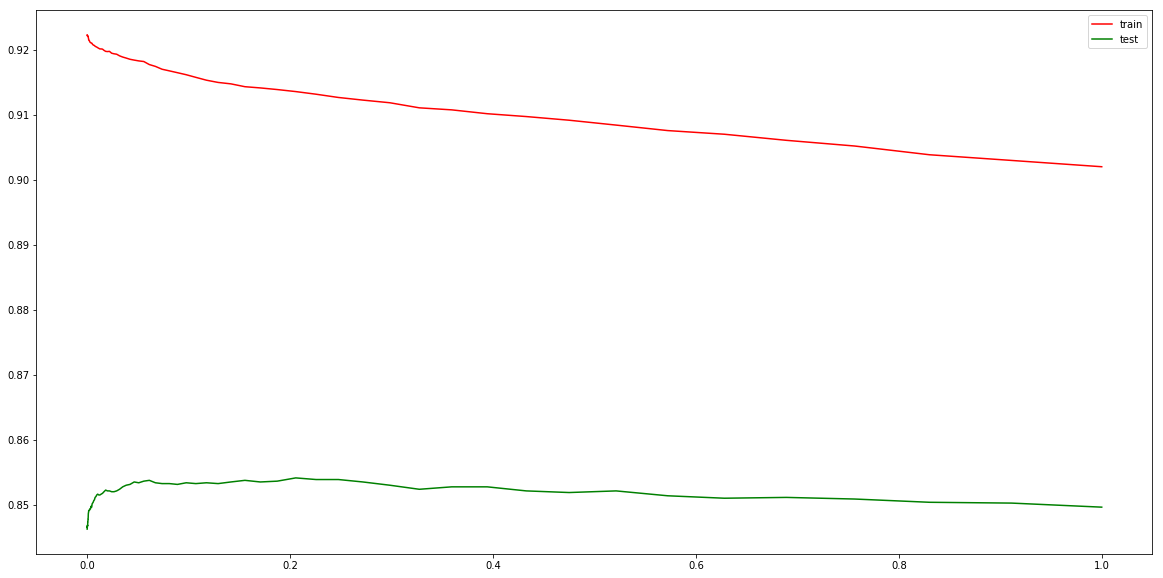

In [992]:
plt.figure(figsize=(20, 10))
plt.plot(grid_search_mnb_idf.cv_results_['param_mnb__alpha'].data[np.arange(0, 1200, 12)].tolist(),
         grid_search_mnb_idf.cv_results_['mean_train_score'][np.arange(11, 1200, 12)], 'r', label='train')
plt.plot(grid_search_mnb_idf.cv_results_['param_mnb__alpha'].data[np.arange(0, 1200, 12)].tolist(),
         grid_search_mnb_idf.cv_results_['mean_test_score'][np.arange(11, 1200, 12)], 'g', label='test')
plt.legend()
plt.show()

### MNB  with TF final Model test results
When testing our final model after tuning the "alpha" parameter, we first aselecting the best precentile features and only then use the tf transformer for weighting features values.

In [993]:

X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]

ch2 = SelectPercentile(chi2, percentile=prcnt)
tfidf_transformer = TfidfTransformer(use_idf=use_idf)

X_train_validate = ch2.fit_transform(X_train_validate, Y_train_validate)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_validate)

print('The train dataset shape: ', X_train_tfidf.shape)

# test transform
X_test = ch2.transform(X_train_counts[8001:])
X_test = tfidf_transformer.transform(X_test)
Y_test = data.cls[8001:]

# Train and test results 
clf_test_mnb_idf = MultinomialNB(alpha=alpha).fit(X_train_tfidf, Y_train_validate)
print("The final train score is: ", clf_test_mnb_idf.score(X_train_tfidf, Y_train_validate))
print("The final test score is: ", clf_test_mnb_idf.score(X_test, Y_test))

The train dataset shape:  (8000, 3539)
The final train score is:  0.90825
The final test score is:  0.858208955224


###Analyzing the test result
In this case we got a different result from what was expected. We got better results for the 'pro' sentiment class. This may be a result of the fact that terms count is more suitable to the 'against' class where features values get higher weight by the count and not by ter frequency. 

Normalized confusion matrix
[[ 0.83  0.17]
 [ 0.11  0.89]]


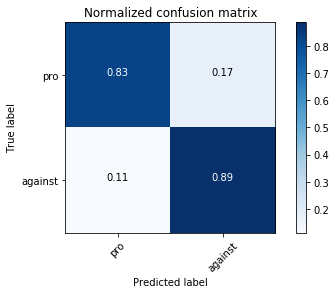

In [994]:
cnf_matrix = confusion_matrix(Y_test, clf_test_mnb_idf.predict(X_test))
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y_test.unique().tolist(), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

##6.4 Linear SVM model
The SVM algorithem find sets of hyperplanes which are used as a seperators between the two sentiment classes in the multi-dimentouial features space. The seperator is a linear separator, although the obrsevations ditrbution is mexed ant not linear. For this reason the model use penalty hyperparameter C, that his role to soften the margin between the two classes and allow classification vaiolations.


In [207]:
from sklearn.svm import SVC

# Cross validation set
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]

# Create a gridsearch using select best percentile of features, and C - a penalty hyperparameter of the model.
ch2 = SelectPercentile(chi2)
pipeline = Pipeline([('pbest', ch2), 
                     ('lsvc', SVC(random_state=4560, kernel='linear'))]
)
parameters = {'pbest__percentile': [20, 25, 30, 35, 40], 
              'lsvc__C': np.logspace(-4, 1, 50)
}

# Fit gridsearch (5 folds were chosen since the long computation time.
grid_search_svm = GridSearchCV(pipeline, parameters, cv=5, verbose=1, 
                               n_jobs=-1, return_train_score=True)
grid_search_svm.fit(X_train_validate, Y_train_validate)


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.6min


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 25.1min


[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 36.3min


[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 47.2min


[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 47.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pbest', SelectPercentile(percentile=10, score_func=<function chi2 at 0x7f3ee6c9ed90>)), ('lsvc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=4560, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'lsvc__C': array([  1.00000e-04,   1.26486e-04,   1.59986e-04,   2.02359e-04,
         2.55955e-04,   3.23746e-04,   4.09492e-04,   5.17947e-04,
         6.55129e-04,   8.28643e-04,   1.04811e-03,   1.32571e-03,
         1.67683e-03,   2.12095e-03,   2.68270e-03,   3.39322e-03,
         ...00,   6.25055e+00,
         7.90604e+00,   1.00000e+01]), 'pbest__percentile': [20, 25, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

### Best model selection - Linear SVM


In [247]:
print(grid_search_svm.best_params_)
print('The best model cross validation mean accuracy is: ', grid_search_svm.best_score_)
c_parameter = grid_search_svm.best_params_['lsvc__C']
prcnt = grid_search_svm.best_params_['pbest__percentile']

{'lsvc__C': 0.11513953993264481, 'pbest__percentile': 40}
The best model cross validation mean accuracy is:  0.857125


### Best features selection - train and validation results
The SVM Best tuning visualization show a classic machine learning resuts. At first, the test result are rising until getting to the optimal model parameters and then getting lower accuarcy as the penalty hyperparameter get bigger. The train accuracy result getting higher as C get higher, meaning a greater overfitting. 

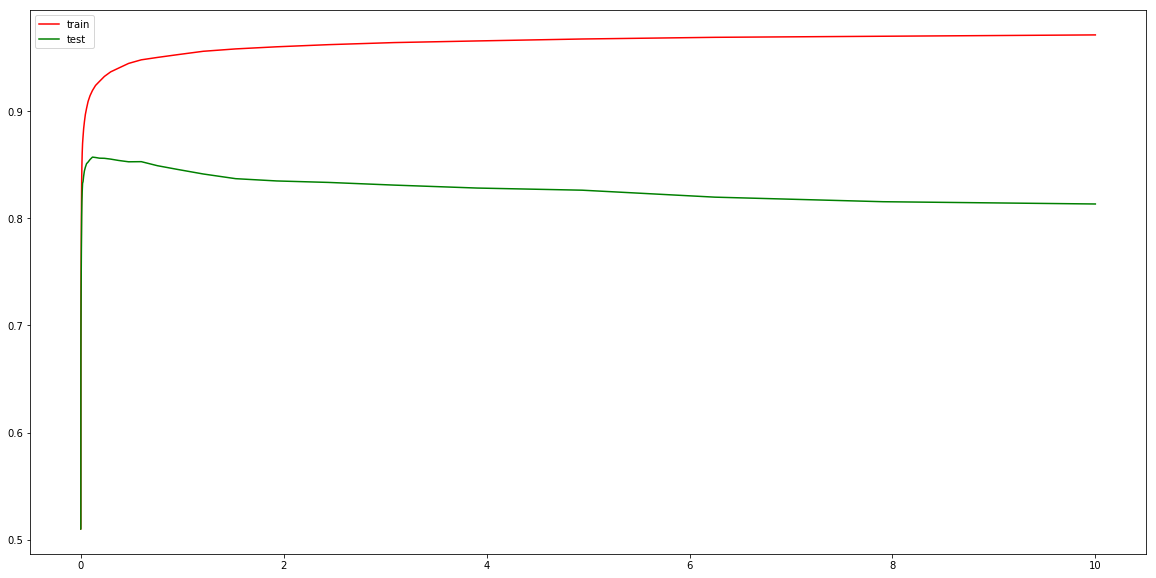

In [209]:
plt.figure(figsize=(20, 10))
plt.plot(grid_search_svm.cv_results_['param_lsvc__C'].data[np.arange(4, 250, 5)].tolist(),
         grid_search_svm.cv_results_['mean_train_score'][np.arange(4, 250, 5)], 'r', label = 'train')
plt.plot(grid_search_svm.cv_results_['param_lsvc__C'].data[np.arange(4, 250, 5)].tolist(),
         grid_search_svm.cv_results_['mean_test_score'][np.arange(4, 250, 5)], 'g', label = 'test')
plt.legend()
plt.show()

### Linear SVM find Model test results

In [210]:
ch2 = SelectPercentile(chi2, percentile=prcnt)
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]
X_train_validate = ch2.fit_transform(X_train_validate, Y_train_validate)
#print(count_vect.get_feature_names())

print('The train dataset shape: ', X_train_validate.shape)

# test transform
X_test = ch2.transform(X_train_counts[8001:])
Y_test = data.cls[8001:]
clf_test_svm = SVC(C=c_parameter, kernel='linear', probability=True).fit(X_train_validate, Y_train_validate)
print("The final train score is: ", clf_test_svm.score(X_train_validate, Y_train_validate))
print("The final test score is: ", clf_test_svm.score(X_test, Y_test))

The train dataset shape:  (8000, 4045)


The final train score is:  0.9135


The final test score is:  0.860541044776


###Analyzing the test result
The Linear SVM result has are more balanced than the other models. In addition, the accuracy results are simmilar to other models. This means the Linear SVM results has a better preformance due to its balane, but not by far. 

Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.15  0.85]]


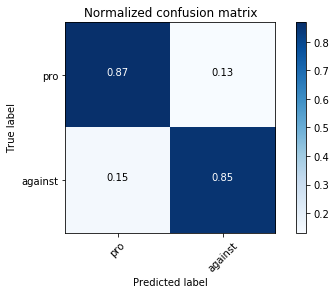

In [211]:
cnf_matrix = confusion_matrix(Y_test, clf_test_svm.predict(X_test))
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y_test.unique().tolist(), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

##6.5 Linear SVM model using TF IDF weighting
We will use the same model as the previous mode, but this time we use tf-idf weighting.


In [212]:
# Cross validation set
from sklearn.svm import SVC
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]

# Create a gridsearch using the previous hyperparameters and adding another 
# parameter of setting the tf-idf to use also the idf normalization 
ch2 = SelectPercentile(chi2)
pipeline = Pipeline([('pbest', ch2),
                     ('tfidf', TfidfTransformer()), 
                     ('lsvc', SVC(random_state=4560, kernel='linear'))]
)
parameters = {'pbest__percentile': [25, 30, 35, 40], 
              'tfidf__use_idf': (True, False),
              'lsvc__C': np.logspace(-4, 1, 30)
}
grid_search_svm_tfidf = GridSearchCV(pipeline, parameters, cv=5, verbose=1,
                                     n_jobs=-1, return_train_score=True)

# Fit model
grid_search_svm_tfidf.fit(X_train_validate, Y_train_validate)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.9min


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 27.0min


[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 44.1min


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 54.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pbest', SelectPercentile(percentile=10, score_func=<function chi2 at 0x7f3ee6c9ed90>)), ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('lsvc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=4560, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'tfidf__use_idf': (True, False), 'lsvc__C': array([  1.00000e-04,   1.48735e-04,   2.21222e-04,   3.29034e-04,
         4.89390e-04,   7.27895e-04,   1.08264e-03,   1.61026e-03,
         2.39503e-03,   3.56225e-03,   5.29832e-03,   7.88046e-03,
         1.17210e-02,   1.74333e-02,   2.59...20e+00,   4.52035e+00,
         6.72336e+00,   1.00000e+01]), 'pbest__percentile': [25, 30, 35, 40]},
       pre_dispatch='2*n_jobs'

### Best model selection - Linear SVM using TF-IDF


In [213]:
print(grid_search_svm_tfidf.best_params_)
print('The best model cross validation mean accuracy is: ', grid_search_svm_tfidf.best_score_)
c_parameter = grid_search_svm_tfidf.best_params_['lsvc__C']
prcnt = grid_search_svm_tfidf.best_params_['pbest__percentile']
use_idf = grid_search_svm_tfidf.best_params_['tfidf__use_idf']

### Linear SVM TF-IDF weighting final Model test results

In [214]:
ch2 = SelectPercentile(chi2, percentile=prcnt)
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]
X_train_validate = ch2.fit_transform(X_train_validate, Y_train_validate)
tfidf_transformer = TfidfTransformer(use_idf=use_idf)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_validate)
#print(count_vect.get_feature_names())

print('The train dataset shape: ', X_train_tfidf.shape)

# test transform
X_test = ch2.transform(X_train_counts[8001:])
X_test = tfidf_transformer.transform(X_test)
Y_test = data.cls[8001:]



clf_test_svm_tfidf = SVC(C=c_parameter, kernel='linear', random_state=4560).fit(X_train_tfidf, Y_train_validate)
print("The final train score is: ", clf_test_svm_tfidf.score(X_train_tfidf, Y_train_validate))
print("The final test score is: ", clf_test_svm_tfidf.score(X_test, Y_test))

The train dataset shape:  (8000, 3539)


The final train score is:  0.928


The final test score is:  0.861473880597


###Analyzing the test result
The result show us no improvement between te models using tf-idf

Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.13  0.87]]


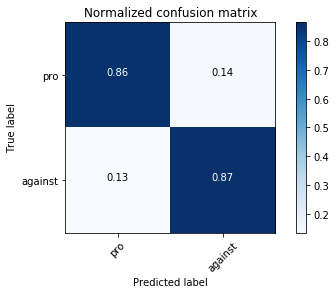

In [215]:
cnf_matrix = confusion_matrix(Y_test, clf_test_svm_tfidf.predict(X_test))
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y_test.unique().tolist(), normalize=True,
                         title='Normalized confusion matrix')
plt.show()

##6.6 Linear SVM model with Stochastic Gradient Descent Learning
Using the Gradient Descent with the hinge loss function, we get a linear SVM model. This model differ from the previous linear SVM model by his implementation of finding optimal weights of the decision function. In this model we choose the penalty which is the rugularization term and "alpha" which is a constant that multiplies the regularization term. Those are the hyperparameters of this model.

In [997]:
from sklearn.linear_model import SGDClassifier

X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]
ch2 = SelectPercentile(chi2)

pipeline = Pipeline([('pbest', ch2),
                     ('sgdc_svm', SGDClassifier(loss='hinge', max_iter=100, 
                                                tol=None, random_state=4650))]
)

parameters = {'pbest__percentile': [25, 30, 35, 40],
              'sgdc_svm__alpha': np.logspace(-4, 1, 100),
              'sgdc_svm__penalty': ['l1', 'l2', 'elasticnet']
              
}

grid_search_sgdc_no = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5,
                                return_train_score=True)
grid_search_sgdc_no.fit(X_train_validate, Y_train_validate)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.7s


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.4s


[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min


[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.3min


[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.3min


[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.5min


[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.9min


[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.4min


[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  9.2min


[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 11.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pbest', SelectPercentile(percentile=10, score_func=<function chi2 at 0x7f3ee6c9ed90>)), ('sgdc_svm', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=4650,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'sgdc_svm__alpha': array([  1.00000e-04,   1.12332e-04, ...,   8.90215e+00,   1.00000e+01]), 'sgdc_svm__penalty': ['l1', 'l2', 'elasticnet'], 'pbest__percentile': [25, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

### Best model seletion - SGD Linear SVM 

In [999]:
print(grid_search_sgdc_no.best_params_)
print('The best model cross validation mean accuracy is: ', grid_search_sgdc_no.best_score_)
alpha = grid_search_sgdc_no.best_params_['sgdc_svm__alpha']
prcnt = grid_search_sgdc_no.best_params_['pbest__percentile']
penal = grid_search_sgdc_no.best_params_['sgdc_svm__penalty']

{'sgdc_svm__alpha': 0.0010235310218990269, 'sgdc_svm__penalty': 'l2', 'pbest__percentile': 40}


The best model cross validation mean accuracy is:  0.85775


### SGD SVM final Model test results

In [1001]:
ch2 = SelectPercentile(chi2, percentile=prcnt)
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]
X_train_validate = ch2.fit_transform(X_train_validate, Y_train_validate)

#print(count_vect.get_feature_names())

print('The train dataset shape: ', X_train_tfidf.shape)

# test transform
X_test = X_train_counts[8001:]
X_test = ch2.transform(X_test)
Y_test = data.cls[8001:]


clf_test_sgdc = SGDClassifier(alpha=alpha,
                              loss='hinge', max_iter=100, tol=None, random_state=4650, 
                              penalty=penal).fit(X_train_validate, Y_train_validate)
print("The final train score is: ", clf_test_sgdc.score(X_train_validate, Y_train_validate))
print("The final test score is: ", clf_test_sgdc.score(X_test, Y_test))

The train dataset shape:  (8000, 3539)
The final train score is:  0.914625
The final test score is:  0.861473880597


###Analyzing the test result
We can observe a larger improvement of the accuracy results and a complete balance between the sentiment classes.

Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.13  0.87]]


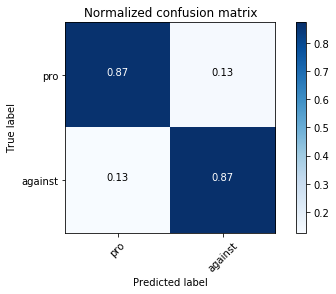

In [219]:
cnf_matrix = confusion_matrix(Y_test, clf_test_sgdc.predict(X_test))
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y_test.unique().tolist(), normalize=True,
                         title='Normalized confusion matrix')
plt.show()

##6.7 Linear SVM model with Stochastic Gradient Descent Learning and TF-IDF weighting
In addition, we are going to build this model using the tf-idf weighting. 

In [1003]:
from sklearn.linear_model import SGDClassifier

X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]
ch2 = SelectPercentile(chi2)

pipeline = Pipeline([('pbest', ch2),
                     ('tfidf', TfidfTransformer()),
                     ('sgdc_svm', SGDClassifier(loss='hinge', max_iter=100, 
                                                tol=None, random_state=4650))]
)

parameters = {'pbest__percentile': [25, 30, 35, 40],
              'tfidf__use_idf': (True, False),
              'sgdc_svm__alpha': np.logspace(-4, 1, 100),
              'sgdc_svm__penalty': ['l1', 'l2', 'elasticnet']
              
}

grid_search_sgdc = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5,
                                return_train_score=True)
grid_search_sgdc.fit(X_train_validate, Y_train_validate)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.9s


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   49.8s


[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min


[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.4min


[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.4min


[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.6min


[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.0min


[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.6min


[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  9.5min


[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 11.5min


[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 13.8min


[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 16.1min


[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 18.7min


[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 21.6min


[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed: 23.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pbest', SelectPercentile(percentile=10, score_func=<function chi2 at 0x7f3ee6c9ed90>)), ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('sgdc_svm', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_int...='l2', power_t=0.5, random_state=4650,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'tfidf__use_idf': (True, False), 'sgdc_svm__alpha': array([  1.00000e-04,   1.12332e-04, ...,   8.90215e+00,   1.00000e+01]), 'sgdc_svm__penalty': ['l1', 'l2', 'elasticnet'], 'pbest__percentile': [25, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

### Best model seletion - SGD Linear SVM with TF-IDF

In [1005]:
print(grid_search_sgdc.best_params_)
print('The best model cross validation mean accuracy is: ', grid_search_sgdc.best_score_)
alpha = grid_search_sgdc.best_params_['sgdc_svm__alpha']
prcnt = grid_search_sgdc.best_params_['pbest__percentile']
use_idf = grid_search_sgdc.best_params_['tfidf__use_idf']
penal = grid_search_sgdc.best_params_['sgdc_svm__penalty']

{'sgdc_svm__alpha': 0.0001788649529057435, 'tfidf__use_idf': True, 'sgdc_svm__penalty': 'l2', 'pbest__percentile': 35}
The best model cross validation mean accuracy is:  0.862625


### SGD SVM with TF-IDF final Model test results

In [1006]:
ch2 = SelectPercentile(chi2, percentile=prcnt)
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]
X_train_validate = ch2.fit_transform(X_train_validate, Y_train_validate)
tfidf_transformer = TfidfTransformer(use_idf=use_idf)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_validate)
#print(count_vect.get_feature_names())

print('The train dataset shape: ', X_train_tfidf.shape)

# test transform
X_test = X_train_counts[8001:]
X_test = ch2.transform(X_test)
X_test = tfidf_transformer.transform(X_test)
Y_test = data.cls[8001:]


clf_test_sgdc_tfidf = SGDClassifier(alpha=alpha,
                                    loss='hinge', max_iter=100, tol=None, random_state=4650, 
                                    penalty=penal).fit(X_train_tfidf, Y_train_validate)
print("The final train score is: ", clf_test_sgdc_tfidf.score(X_train_tfidf, Y_train_validate))
print("The final test score is: ", clf_test_sgdc_tfidf.score(X_test, Y_test))

The train dataset shape:  (8000, 3539)
The final train score is:  0.9245
The final test score is:  0.869869402985


###Analyzing the test result
We can observe a larger improvement of the accuracy results and a complete balance between the sentiment classes.

Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.13  0.87]]


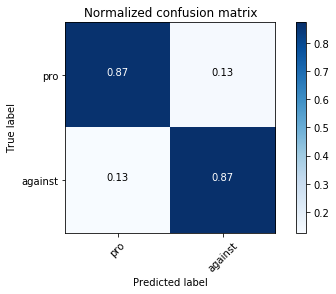

In [219]:
cnf_matrix = confusion_matrix(Y_test, clf_test_sgdc_tfidf.predict(X_test))
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=Y_test.unique().tolist(), normalize=True,
                         title='Normalized confusion matrix')
plt.show()

#7. Comparing the models
After training the final model of each classification model, we can not determine which model dominate the others in a significant manner. Therefore, we will use another Cross Validation on the test set and comparing the mean error of the models by a satistiacal tests and parametrics ways    

In [1008]:
from sklearn.model_selection import train_test_split

bnb = Pipeline([('pbest', SelectPercentile(chi2, percentile=grid_search_bnb.best_params_['pbest__percentile'])),
                ('bnb', BernoulliNB(alpha=grid_search_bnb.best_params_['bnb__alpha']))])

mnb = Pipeline([('pbest', SelectPercentile(chi2, percentile=grid_search_mnb.best_params_['pbest__percentile'])),
                ('mnb', MultinomialNB(alpha=grid_search_mnb.best_params_['mnb__alpha']))])

mnb_idf = Pipeline([('pbest', SelectPercentile(chi2, percentile=grid_search_mnb_idf.best_params_['pbest__percentile'])),
                    ('tfidf', TfidfTransformer(use_idf=grid_search_mnb_idf.best_params_['tfidf__use_idf'])),
                    ('mnb', MultinomialNB(alpha=grid_search_mnb_idf.best_params_['mnb__alpha']))])

svm = Pipeline([('pbest', SelectPercentile(chi2, percentile=grid_search_svm.best_params_['pbest__percentile'])), 
                ('lsvc', SVC(C=grid_search_svm.best_params_['lsvc__C'], kernel='linear', random_state=4560))])

svm_idf = Pipeline([('pbest', SelectPercentile(chi2, percentile=grid_search_svm_tfidf.best_params_['pbest__percentile'])),
                    ('tfidf', TfidfTransformer(use_idf=grid_search_svm_tfidf.best_params_['tfidf__use_idf'])), 
                    ('lsvc', SVC(C=grid_search_svm_tfidf.best_params_['lsvc__C'], kernel='linear', random_state=4560))])

sgdc = Pipeline([('pbest', SelectPercentile(chi2, percentile=grid_search_sgdc_no.best_params_['pbest__percentile'])),
                 ('sgdc_svm', SGDClassifier(loss='hinge', alpha=grid_search_sgdc_no.best_params_['sgdc_svm__alpha'],
                                            penalty=grid_search_sgdc_no.best_params_['sgdc_svm__penalty'],
                                            max_iter=100, tol=None, random_state=4650))])

sgdc_idf = Pipeline([('pbest', SelectPercentile(chi2, percentile=grid_search_sgdc.best_params_['pbest__percentile'])),
                     ('tfidf', TfidfTransformer(use_idf=grid_search_sgdc.best_params_['tfidf__use_idf'])),
                     ('sgdc_svm', SGDClassifier(loss='hinge', alpha=grid_search_sgdc.best_params_['sgdc_svm__alpha'],
                                                penalty=grid_search_sgdc.best_params_['sgdc_svm__penalty'],
                                                max_iter=100, tol=None, random_state=4650))])            


models = [bnb, mnb, mnb_idf, svm, svm_idf, sgdc, sgdc_idf]


## 7.1 Mcnemar test
We will use this test to check if using the TF-IDF vectorizer has a significant impact on the model preformance. The total significance level desired is 6%. Using Bonforoni Inequality, every test will have a 2% significant level.

Under the null hypothesis, the two models have the same error rate.

In [1040]:
predictions = []
for model in models[1:]:
    model.fit(X_train_counts[0:8000], data.cls[0:8000])
    predictions.append(model.predict(X_train_counts[8001:]) == data.cls[8001:])

mcnemar_data = list(zip(predictions[0], predictions[1], predictions[2],
         predictions[3], predictions[4], predictions[5]))

cols = ['mnb', 'mnb_idf', 'svm', 'svm_idf', 'sgdc', 'sgdc_idf']

mcnemar_df = pd.DataFrame(mcnemar_data, columns=cols)
mcnemar_df.head(10)
    


,mnb,mnb_idf,svm,svm_idf,sgdc,sgdc_idf
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,True,False,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,False,False,False,False,False,False


In [1074]:
from statsmodels.sandbox.stats.runs import mcnemar

mnb_mcnemar = mcnemar(mcnemar_df.mnb, mcnemar_df.mnb_idf, exact=False)
svm_mcnemar = mcnemar(mcnemar_df.svm, mcnemar_df.svm_idf, exact=False)
sgdc_mcnemar = mcnemar(mcnemar_df.sgdc, mcnemar_df.sgdc_idf, exact=False)
print('The tests results p-values are:\n'
      'mnb - {:.3f}\n'
      'svm - {:.3f}\n'
      'sgdc - {:.3f} \n'.format(mnb_mcnemar[1], svm_mcnemar[1], sgdc_mcnemar[1]))


The tests results p-values are:
mnb - 0.026
svm - 0.929
sgdc - 0.118 



### Mcnemar test result
The tests results has shown us that using TF-IDF weighting wouldn't improve our models with a 6% significant level. 
Therefore, we will deprecated those models and remain with 4 models:

Bernoulli-NB, Multinominal-NB, SVM and SGD (other form of SVM). 

##7.2 5*2 Cross Validation
We will perform this Cross Validation variation and compare with a t-test the means of each model.

In [1135]:
models = [bnb, mnb, svm, sgdc]

def five_two_cv(model, X, Y):
    scores = []
    for split in range(5):
        X_split1, X_split2, y_split1, y_split2 = train_test_split(X, Y, test_size=0.5,
                                                                  random_state=((9*((2+split)**10))+1))
        model.fit(X_split1, y_split1)
        scores.append(model.score(X_split2, y_split2))
        model.fit(X_split2, y_split2)
        scores.append(model.score(X_split1, y_split1))
    return scores
    
    
models_scores = []

for model in models:
    models_scores.append(five_two_cv(model, X_train_counts, data.cls))




In [1136]:
scores_df = pd.DataFrame(models_scores, index=['bnb', 'mnb', 'svm', 'sgdc'])
scores_df.loc['fold_sd'] = scores_df.std()
scores_df['model_mean'] = scores_df.apply(np.mean, 1)
scores_df['model_std'] = scores_df.apply(np.std, 1)
scores_df


,0,1,2,3,4,5,6,7,8,9,model_mean,model_std
bnb,0.842894,0.834188,0.844076,0.843454,0.849793,0.843849,0.845456,0.846215,0.845259,0.843849,0.843903,0.003567
mnb,0.847822,0.837145,0.843682,0.843849,0.847428,0.844637,0.843879,0.844637,0.851961,0.839117,0.844416,0.003811
svm,0.848610,0.848383,0.847230,0.848975,0.851173,0.853115,0.847822,0.846017,0.848413,0.851144,0.849088,0.001918
sgdc,0.849990,0.852524,0.851961,0.850158,0.853735,0.857453,0.851567,0.846017,0.847033,0.854692,0.851513,0.003104
fold_sd,0.003090,0.008786,0.003827,0.003453,0.002637,0.006624,0.003343,0.000729,0.002840,0.007030,0.004236,0.002214


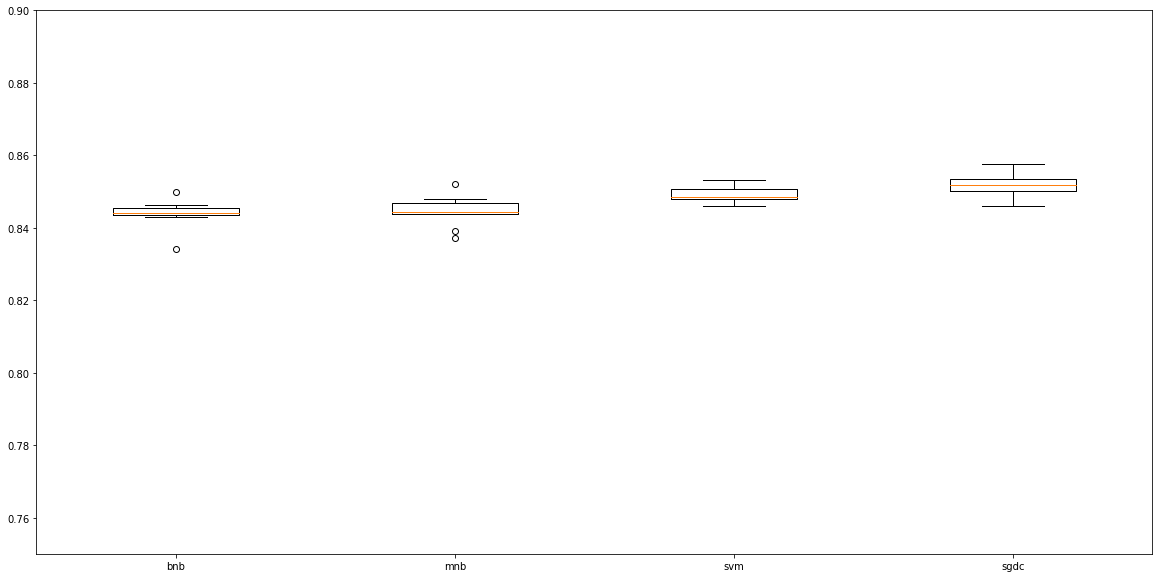

In [1137]:
from scipy import stats
fig = plt.figure(figsize=(20, 10)).add_subplot(111)
plt.boxplot(models_scores)
fig.set_xticklabels(['bnb', 'mnb',  'svm', 'sgdc'])
plt.ylim(0.75, 0.9)
plt.show()

In [1275]:
from scipy.stats import t

def cv5_2_test(vector_A, vector_B, alpha):
    """
    The null hypothesis - no diffrence (right tail)
    :param vector_A: 
    :param vector_B: 
    :param significant_level: 
    :return: a tuple: (reject the null hypothesis, t statistic)
    """
    vector_A = np.array(vector_A)
    vector_B = np.array(vector_B)
    p_A_1 = vector_A[0:9:2]
    p_B_1 = vector_B[0:9:2]
    p_A_2 = vector_A[1:10:2]
    p_B_2 = vector_B[1:10:2]
    p_1 = p_A_1 - p_B_1
    p_2 = p_A_2 - p_B_2
    p_average = (p_1 + p_2)/2
    s_square = (p_1 - p_average)**2 + (p_2 - p_average)**2
    t_st = p_1[0]/np.sqrt(sum(s_square)/5)
    return t_st > t.ppf(1-alpha, df=5), t_st

In [1277]:
sgdc_bnb = cv5_2_test(scores_df.loc['sgdc'], scores_df.loc['bnb'], 0.02)
sgdc_mnb = cv5_2_test(scores_df.loc['sgdc'], scores_df.loc['mnb'], 0.02)
sgdc_svm = cv5_2_test(scores_df.loc['sgdc'], scores_df.loc['svm'], 0.02)
print('The tests results for comparing SGDV SVM model to the other models:\n'
      'bnb - {}\n'
      'mnb - {}\n'
      'svm - {} \n'.format(sgdc_bnb[0], sgdc_mnb[0], sgdc_svm[0]))

The tests results for svm model being better than the others:
bnb - False
mnb - False
svm - False 



##7.3 Chosen model
Although the statistical tests didn't showed us any significant supreme model, we preformed some random tests on different twitter users. We test our 2 top models - Linear SVM and SGD Linear SVM which preformed better than the others and had more balanced prediction results. 

The type of users being tested were: 
1. Pro user - most of his tweets not related to the BDS issue.
2. Pro user - most of his tweets are related to the BDS issue.
3. Neutral user.
4. Against user.

This random tests has shown us that the SGDC has better results and know how to deal pretty good with neutral users.

Therfore, we have decided to choose the SGD LInear SVM classifier to be our predicive model for user classification.

#8. Choose BDS user pro tweets precent thresholds
After choosing our predictive models, we need to choose some thresholds for having a desired confidence level of 95%. This is specifically important when we deal with the neutral type of users (type 3) and the pro users type that most of their tweets are not related to the BDS issue (type 2).

##8.1 SGD - SGDC classifier confidence level research

In [6]:
from sklearn.linear_model import SGDClassifier
X_train_validate = X_train_counts[0:8000]
Y_train_validate = data.cls[0:8000]
X_test = X_train_counts[8001:]
Y_test = data.cls[8001:]


pipe_sgdc = Pipeline([('chi2', SelectPercentile(chi2, 40)),
                      ('clf', SGDClassifier(loss='hinge', 
                                            alpha=0.0010235310218990269,
                                            penalty='l2', max_iter=100, tol=None,
                                            random_state=4650))])
pipe_sgdc.fit(X_train_validate, Y_train_validate)
pipe_sgdc.score(X_test, Y_test)

0.86100746268656714

###Visualize the test set predictions decision distances

Text(0.5,1,'pro - wrong - better resolution')

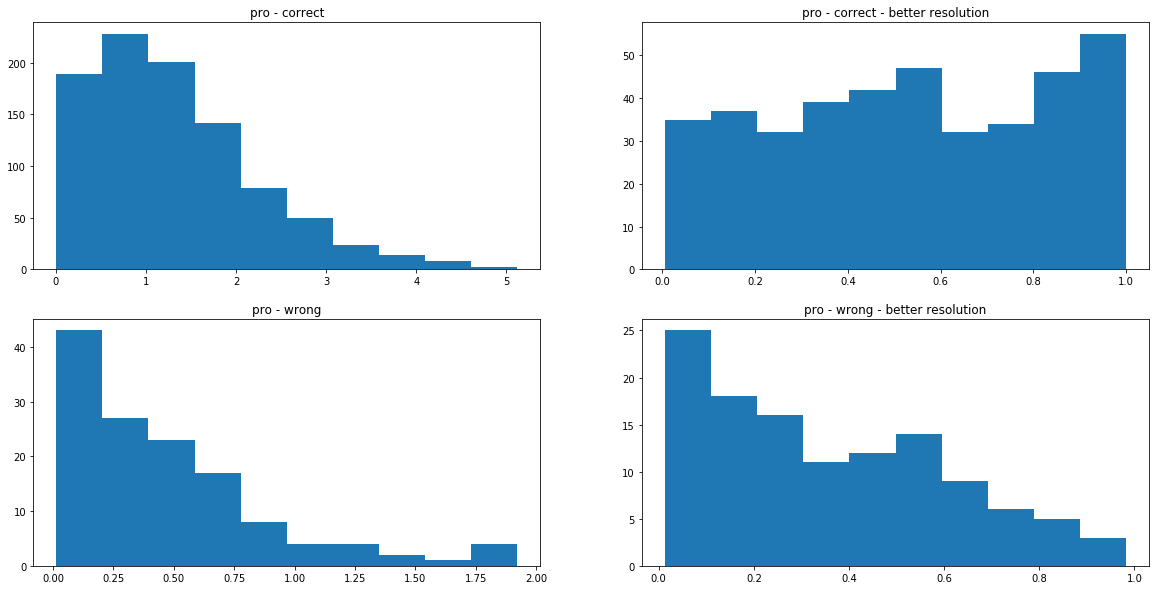

In [27]:


ls = list(zip(pipe_sgdc.decision_function(X_test),
              pipe_sgdc.predict(X_test),
              pipe_sgdc.predict(X_test) == Y_test,
              Y_test))
df = pd.DataFrame(ls, columns=['desicion', 'predict', 'choise', 'real_label'])
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.hist(df.desicion[(df.predict=='pro') & (df.choise==True)])
plt.title('pro - correct')
plt.subplot(222)
plt.hist(df.desicion[(df.predict=='pro') & (df.choise==True) & (df.desicion<1)])
plt.title('pro - correct - better resolution')
plt.subplot(223)
plt.hist(df.desicion[(df.predict=='pro') & (df.choise==False)])
plt.title('pro - wrong')
plt.subplot(224)
plt.hist(df.desicion[(df.predict=='pro') & (df.choise==False) & (df.desicion<1)])
plt.title('pro - wrong - better resolution')


Text(0.5,1,'against - wrong - better resolution')

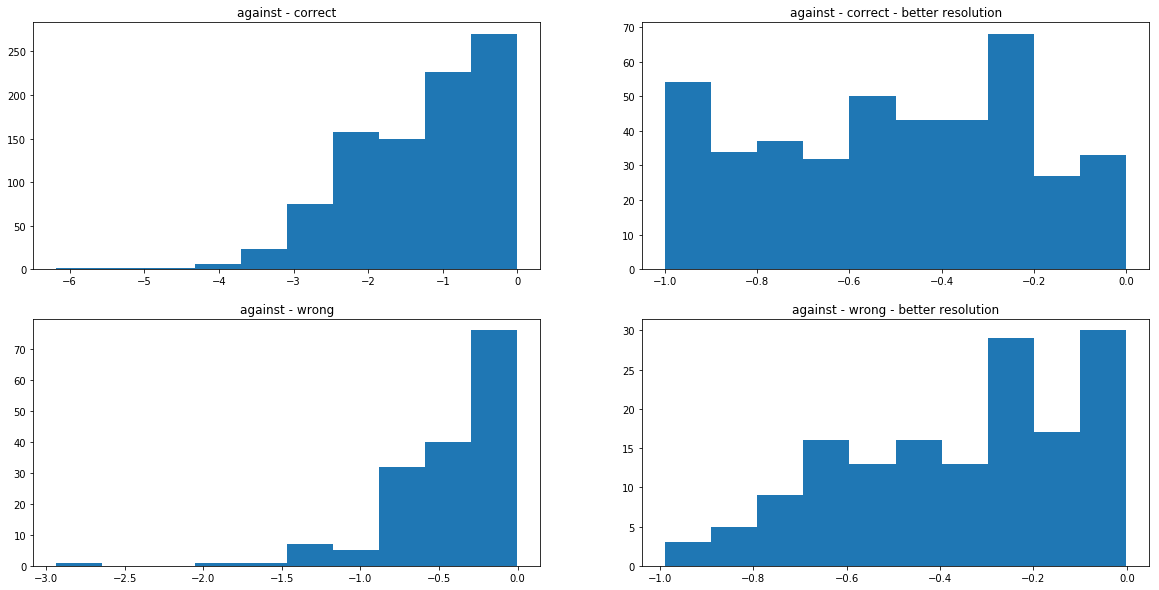

In [26]:

ls = list(zip(pipe_sgdc.decision_function(X_test),
              pipe_sgdc.predict(X_test),
              pipe_sgdc.predict(X_test) == Y_test))
df = pd.DataFrame(ls, columns=['desicion', 'predict', 'choise'])
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.hist(df.desicion[(df.predict=='against') & (df.choise==True)])
plt.title('against - correct')
plt.subplot(222)
plt.hist(df.desicion[(df.predict=='against') & (df.choise==True) & (df.desicion>-1)])
plt.title('against - correct - better resolution')
plt.subplot(223)
plt.hist(df.desicion[(df.predict=='against') & (df.choise==False)])
plt.title('against - wrong')
plt.subplot(224)
plt.hist(df.desicion[(df.predict=='against') & (df.choise==False) & (df.desicion>-1)])
plt.title('against - wrong - better resolution')



In [21]:
correct = df.desicion[(df.predict=='pro') & (df.choise==True) & (df.desicion>0.65)].count()
total = df.desicion[df.desicion>0.65].count()
confidence = correct/total
print('With a chosen desicion threshold of 0.65 distance we get a {} level of significance.').format(confidence)

0.95403899721448471